In [1]:
import importlib
import Compute_evolution_of_clusters
importlib.reload(Compute_evolution_of_clusters)
from Compute_evolution_of_clusters import *

import matplotlib.pyplot as plt
import sys

sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Analysis/')
sys.path.append('/home/hugo/PostDoc/aging_condensates/Gillespie/Analysis/')
from ToolBox import *

sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Gillespie_backend')
import Gillespie_backend as Gil

sys.path.append('/home/hcleroy/Extra_Module_py')
sys.path.append('/home/hugo/Extra_Module_py')
import formated_matplotlib

Ec = lambda L,N : 3/2*np.log(L/N* np.pi/3)

In [12]:
# gillespie parameter
Nlinker = 20
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 100/(V) # for 3D
Energy = -15
Nprocess = 10
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 200000
compute_steps = 10000

5.937210903914155


In [13]:
parallel_cluster_size_evolution(args,step_tot,compute_steps,'c_size_20_linkers_Ell_10E3_b.hdf',3.)

In [15]:
average_result_b = np.zeros((step_tot//compute_steps,2),dtype=float)
with pt.open_file('c_size_20_linkers_Ell_10E3_b.hdf','r') as file:
    n = 0
    for array in file.list_nodes('/',classname='Array'):
        average_result_b+=array
        n+=1
    average_result_b /= n

In [10]:
average_result = np.zeros((step_tot//compute_steps,2),dtype=float)
with pt.open_file('c_size_20_linkers_Ell_10E3.hdf','r') as file:
    n = 0
    for array in file.list_nodes('/',classname='Array'):
        average_result+=array
        n+=1
    average_result /= n

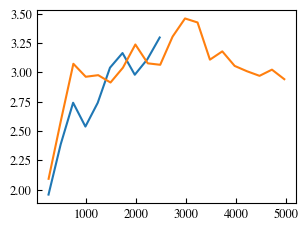

In [16]:
plt.plot(average_result[:,0],average_result[:,1])
plt.plot(average_result_b[:,0],average_result_b[:,1])